## Computer vision 2025 Assignment 3
## Manh Ha Nguyen - a1840406
## Deep Learning for Perception Tasks

This assignment contains 2 questions. The first question probes understanding of deep learning for classification. The second question requires you to write a short description of a Computer Vision method. You wil need to submit two separate PDF files, one for each question.

# Question 1: A simple classifier, 20 marks (60% of the assignment)

For this exercise, we provide demo code showing how to train a network on a small dataset called Fashion-MNIST. Please run through the code "tutorial-style" to get a sense of what it is doing. Then use the code alongside lecture notes and other resources to understand how to use pytorch libraries to implement, train and use a neural network.

For the Fashion-MNIST dataset the labels from 0-9 correspond to various clothing classes so you might find it convenient to create a python list as follows:

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

You will need to answer various questions about the system, how it operates, the results of experiments with it and make modifications to it yourself. You can change the training scheme and the network structure.

Organize your own text and code cell to show the answer of each question below.

Detailed requirements:

### Q1.1 (1 point)

Extract 3 images of different types of clothing from the training dataset, print out the size/shape of the training images, and display the three with their corresponding labels.

### Q1.2 (2 point) 

Run the training code for 10 epochs, for different values of the learning rate. Fill in the table below and plot the loss curves for each experiment:

|Lr|Accuracy|
|---|---|
|1   |    19.97%  |
|0.1|      87.53%    |
|0.01|       83.56%  |
|0.001  |      71.35%  |


### Q1.3 (3 point) 
Report the number of epochs when the network converges (or number of epochs for the best accuracy, if it fails to converge). Fill in the table below and plot the loss curve for each experiment. Please run the code for more than 10 epochs (e.g., 50 or 100) and report when you observe convergence.:

|Lr|Accuracy|Epoch|
|---|---|---|
|1   |    10%  |   1  |
|0.1|     86.85%     |  13  |
|0.01|      86.88%   |   30 |
|0.001  |   80.85%     |   30  |


### Q1.4 (2 points) 

Compare the results in table 1 and table 2, what is your observation and your understanding of learning rate?
Observations:
- High Learning Rate (Lr=1):
    - Initial (10 epochs): Accuracy is very low (19.74%).
    - Extended training: The accuracy dropped further to 10% by epoch 1, indicating no meaningful learning and unstable training.
- Moderate Learning Rate (Lr=0.1):
    - Initial (10 epochs): Accuracy was relatively high (87.62%).
    - Extended training: Accuracy slightly decreased to 86.85% at epoch 13, suggesting quick convergence but potential slight overfitting or instability with further epochs.
- Lower Learning Rate (Lr=0.01):
    - Initial (10 epochs): Accuracy was decent (83.17%).
    - Extended training: Improved accuracy to 86.88% by epoch 30, indicating stable and steady convergence.
- Very Low Learning Rate (Lr=0.001):
    - Initial (10 epochs): Accuracy was lower (70.73%), indicating slower initial learning.
    - Extended training: Increased accuracy to 80.85% at epoch 30, demonstrating slow but stable learning.

Understanding of Learning Rate:
- The learning rate (Lr) significantly impacts training stability, convergence speed, and final accuracy.
- High learning rates (Lr=1) lead to rapid but unstable training, preventing effective learning and resulting in poor accuracy.
- Moderate learning rates (Lr=0.1) enable fast and good initial convergence, but risk instability or slight degradation if trained too long.
- Lower learning rates (Lr=0.01) offer balanced stability, achieving reliable and consistent improvement in accuracy over a moderate number of epochs.
- Very low learning rates (Lr=0.001) slow down training, requiring more epochs to achieve comparable performance, though they often yield stable and gradually improving results.

### Q1.5 (5 points) 

Build a wider network by modifying the code that constructs the network so that the hidden layer(s) contain more perceptrons, and record the accuracy along with the number of trainable parameters in your model.  Now modify the original network to be deeper instead of wider (i.e. by adding more hidden layers). Record your accuracy and network size findings. Plot the loss curve for each experiment. Also plot the test accuracy and loss for both the wider and deeper architectures and discuss what you observe. Write down your conclusions about changing the network structure?  

|Structures|Accuracy|Parameters|
|---|---|---|
|Base   |   86.87%   |669706|
|Deeper|      86.60%    |1195018|
|Wider|     86.98%    |1863690|

Observations:
- Accuracy and Parameters:
    - Base Network: Accuracy = 86.87%, Parameters = 669,706.
    - Wider Network: Slight accuracy increase (86.98%) but significant parameter increase (1,863,690).
    - Deeper Network: Slight accuracy decrease (86.60%) with moderate parameter increase (1,195,018).
- Loss Curve Analysis:
    - Base vs. Wider Network: Loss curves for training and testing are virtually identical, suggesting that additional neurons (width) provided minimal improvements despite greatly increasing model complexity.
    - Deeper Network: Exhibited slightly slower or less effective convergence compared to both base and wider networks, suggesting challenges in optimizing additional depth.

Conclusions:
- Widening the network slightly improved accuracy but at a significant computational cost, with minimal visible changes in training dynamics.
- Deepening the network without optimization techniques slightly decreased performance and introduced potential optimization challenges.
- Practically, modest widening can be beneficial, but significant increases in parameters must be justified by notable accuracy gains.
- Simply adding depth without additional optimization strategies did not yield meaningful performance improvements, suggesting limited effectiveness of deeper architectures in this specific case.



### Q1.6 (2 points) 

Calculate the mean of the gradients of the loss to all trainable parameters. Plot the gradients curve for the first 100 training steps. What are your observations? Note that this gradients will be saved with the training weight automatically after you call loss.backwards(). Hint: the mean of the gradients decrease.

Discussion:
- Learning rate = 1e-3
    - Two-phase behavior:
        - Phase 1 (acceleration): in the first ~2 000 steps (2 epochs) the mean gradient drifts steadily away from zero, reaching its largest magnitude around –2.7e-4. This shows the model picking up speed once it escapes its random initialization.
        - Phase 2 (decay): after that peak, the gradient magnitude slowly shrinks back toward zero over the remaining 13 epochs, settling around –1e-4 by the end.
    - Interpretation: the “rise-then-fall” pattern reveals an initial exploratory phase (larger updates to escape plateaus) followed by a fine-tuning phase (smaller updates as the model homes in on a minimum).

- Learning rate = 1e-2
    - Rapid peak, noisy plateau:
        - The mean gradient ramps up even faster—peaking near -2.4e-4 within the first few hundred steps.
        - Rather than decaying cleanly, it then oscillates heavily around ±1e-4 for the rest of training.
    - Interpretation: you get a quicker “burst” of learning but with much more jitter. Updates remain large and noisy, indicating this LR is near the stability limit: it still converges, but less smoothly than 1e-3.

- Learning rate = 1e-1
    - Persistent instability:
        - From step 0 onward, gradients swing wildly between –2.5e-4 and +4e-4, with no discernible rise-or-fall trend.
        - There’s no phase where gradient magnitudes settle or decay—just constant high-frequency noise.
    - Interpretation: this LR is too large. The optimizer continually overshoots any basin and never enters a fine-tuning regime, so the network fails to converge.

- Conclusion: 
    - For suitably small learning rates (1e-3 and 1e-2), the mean gradient magnitude decreases over training—reflecting progressively smaller parameter updates as the model approaches a minimum. 
    - In contrast, a too-large rate (1e-1) yields noisy, non-decaying gradients and no convergence.

For more explanation of q1.7, you could refer to the following simple instructions: https://colab.research.google.com/drive/1XAsyNegGSvMf3_B6MrsXht7-fHqtJ7OW?usp=sharing

### Q1.7 (5 points) 
Modify the network structure and training/test to use a small convolutional neural network instead of an MLP. Discuss your findings with regard to convergence, accuracy and number of parameters, relative to MLPs.  

Hint: Look at the structure of the CNN in the Workshop 3 examples.

Discussion:
|Structures|Accuracy|Parameters|Learning Rate|Epochs|
|---|---|---|---|---|
|Base   |   86.87%   |669706|0.01|30|
|CNN | 87.79%|44374|0.01|30|

Observations:
- Accuracy and Parameters Comparison:
    - Base MLP: Achieved accuracy of 86.87% with 669,706 parameters.
    - CNN: Improved accuracy (87.79%) with significantly fewer parameters (44,374).
- Loss Curve Analysis (CNN):
    - The CNN structure demonstrated rapid convergence in both training and test loss curves.
    - The CNN converged smoothly and quickly within the first few epochs, maintaining stable and closely matching train and test losses, indicating excellent generalization and minimal overfitting.

Key Insights:
- Convergence:
    - CNNs converge faster and more stably compared to MLPs. This likely results from CNNs' ability to effectively exploit spatial structures within image data.

- Accuracy:
    - CNN achieved a higher accuracy compared to the MLP despite having drastically fewer parameters, highlighting superior efficiency.

- Number of Parameters:
    - CNN architecture dramatically reduced model complexity while still improving performance, demonstrating superior parameter efficiency for image classification tasks.

Conclusions:
- CNN are significantly more effective than MLP.
- CNN architectures achieve better accuracy, faster and more stable convergence, and lower complexity (fewer parameters).
- The convolutional operation, combined with pooling layers, allows CNN to capture spatial hierarchies effectively, leading to enhanced generalization performance compared to fully-connected MLP architectures.







# Q2 Optional Bonus Question  (5 points, upto 20% bonus marks of the assignment) 

Experiment with different activation functions (ReLU, Tanh, Sigmoid) and analyse their impact on training performance.(2 points) 

In particular, focus your analysis on the Sigmoid activation function and discuss your finding of training with and without Xavier initialization. You may use the provided code for Xavier initialisation for this. (1 points)

Additionally, plot both the gradient and loss curves for your experiments. For gradient analysis, you may select one representative layer to monitor throughout training and briefly explain your choice. (1 points)

Discuss how gradients and loss behave across the network for different activation functions and initialisation methods if you see any difference. (1 points) 

Note: the bonus marks wont replace marks for Q3.

Discussion:
**Result Table**
|Activation|Accuracy (No Xavier)|Accuracy (Xavier Init)
|---|---|---|
|ReLU|86.78%|87.40%|
|Sigmoid|65.16%|76.66%|
|Tanh|85.99%|87.07%|

Set up:
- Architecture & task: three-layer MLP trained for 30 epochs on the assignment dataset (same optimiser & learning-rate in all runs).
- Variants tested
    - Activations: ReLU, Tanh, Sigmoid
    - Initialisation: Kaiming (default) vs Xavier
- Monitored layer for gradients: first hidden layer
    - Nearest to the input, so any exploding/vanishing trend appears here earliest and then cascades; easy to compare across activations because its fan-in/out is identical in every run.

Observation:
- Xavier gives only approximately 0.6~1 pp boost for ReLU/Tanh, but a big +11.5 pp jump for Sigmoid.
- Sigmoid Activation:
    - Loss Curve:
        - Kaiming: 12-epoch flat plateau at around 2.29; sharp fall only after epoch 12.
        - Xavier: Smooth decline from epoch 1; hits around 0.6 by epoch 30.
    - Gradient:
        - Kaiming: Starts 2~3e-5 then collapses to 0 by around step 40 -> network “frozen”
        - Xavier: Starts 7e-5; decays slowly, still alive past step 60 -> continual learning.
    - Interpretation:
        - When the network starts with default Kaiming initialisation—which is tuned for ReLU but not for a bounded, S-shaped activation like sigmoid—many neurons receive large enough inputs that they sit in the flat “saturated” ends of the curve, where the slope of the sigmoid function is essentially zero. Because the back-propagated error signal is multiplied by that near-zero slope, the gradients all but vanish, learning stalls, and accuracy tops out around 65 percent. 
        - In contrast, switching to Xavier initialisation scales the weights so that the pre-activation values cluster near the sigmoid’s steep, almost-linear centre. This avoids early saturation, preserves healthy gradient flow through the network, and ultimately yields an 11.5 pp improvement in final accuracy.
    
    => Variance-preserving initialisation is critical when using bounded, non-zero-centred activations like Sigmoid

- Gradient & Loss Curves:
    - ReLU: loss plunges in first 5 epochs with either init; gradients remain non-zero but taper slowly. Xavier simply gives a larger, steadier gradient band, shaving a few epochs off convergence.
    - Sigmoid: with Kaiming init, gradient plataue early -> flat loss; Xavier shifts entire trace up, preventing collapse.
    - Tanh: already zero-centred, so no severe saturation; Xavier mostly enlarges early gradients, giving a modest speed-up.

Conclusion:
- ReLU remains robust with both weights initialisation, but balanced variance still accelerates early optimisation.
- Tanh benefits modestly from Xavier; its zero-centred nature already mitigates gradient drift.
- Sigmoid requires variance-aware initialisation to avoid plateaus.
- Monitoring the first hidden layer is sufficient to diagnose exploding/vanishing trends because these propagate backward to deeper layers.
- For deeper nets or more stubborn datasets, combine good initialisation with normalisation layers or switch to non-saturating activations to have a better chance of stable training.



# Question 3: Proposal for Practical Applications (40%)

In this part of the assignment you need to write a report about an application of a computer vision algorithm or technique. This can either be an application that you are aware of and possibly even use, such as a phone app, or it could be speculation -- an application that you think would benefit from using computer vision.

Begin by choosing a particular CV idea, method or problem area, such as:

a. removing noise in an image

b. increasing the resolution of an image

c. detecting and/or identifying objects in an image

d. segmenting images into constituents parts

e. estimating the depth of an object from one or more images

f. estimating the motion of two objects in different frames

g. others

Now think about various ways your chosen technique could be used. Here is a list of possible applications you could consider, but you are not restricted to this list, and there will be credit given for sensible invention outside this list (but no penalty if you don't want to be "inventive"): image editing systems in your phone; enhancement of images from old film; obstacle detection and avoidance for a domestic robot; facial recognition for phone security; cancer detection; person tracking and re-identification in security cameras; sport decision review systems; road-sign detection and interpretation for self-driving cars.

This is a little bit back-to-front from what might happen in real life in which the application usually motivates the solution, but the emphasis here is on an understanding of the CV technique.

You need to write a short report (800 words max) in which you do the following:
1. Clearly define the CV problem/area and describe its application scenarios
2. Briefly describe a solution based on image processing, computer vision and/or machine learning.
3. Discuss the advantages and the limitations of this method in various application scenarios.
4. It is important that you will define a useful metric to evaluate the performance of your method and discuss its tradeoff specific to the problem you have chosen.
5. You are welcome to cite existing work and take inspiration form literature addressing the problem you choose.

Hint1: Submit an individual pdf report for question 2.

Hint2: Organise your report well

Hint3: You can use diagrams, flow charts or other figures in your report for better understanding of your solution.  

** For Q3, you do not need to implement your solution; just write the proposal/report and submit it as a separate PDF **




# Set up and Import

In [16]:
import torch, torchvision
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np, time, math, pprint
%matplotlib inline

if torch.cuda.is_available():
    device = "cuda"
else:
    device =  "cpu"
    
print("Using", device)
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat',
               'Sandal','Shirt','Sneaker','Bag','Ankle boot']


Using cpu


# Helper functions

In [17]:
# Define the neural network
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28 * 28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        return self.linear_relu_stack(x)

# Xavier weight initialization
def init_weights(m):
    if isinstance(m, nn.Linear):
        nn.init.xavier_uniform_(m.weight)
        if m.bias is not None:
            nn.init.zeros_(m.bias)

# Training loop 
def train(dataloader, model, loss_fn, optimizer):
    model.train()
    losses = []
    total = len(dataloader.dataset)
    for batch_idx, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        optimizer.zero_grad()
        preds = model(X)
        loss = loss_fn(preds, y)
        loss.backward()
        optimizer.step()

        losses.append(loss.item())
        if batch_idx % 100 == 0:
            seen = batch_idx * dataloader.batch_size
            print(f"  [Batch {batch_idx:03d}] loss: {loss:.6f}  ({seen}/{total})")

    return np.mean(losses)

# Test loop 
def test(dataloader, model, loss_fn):
    model.eval()
    losses, correct = [], 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            preds = model(X)
            losses.append(loss_fn(preds, y).item())
            correct += (preds.argmax(dim=1) == y).sum().item()

    avg_loss = np.mean(losses)
    accuracy = correct / len(dataloader.dataset)
    return accuracy, avg_loss

# Plotting function
def plot_train_test_loss(train_losses, test_losses, test_accuracies, lr):
    epochs = np.arange(1, len(train_losses) + 1)
    best_epoch = int(np.argmax(test_accuracies)) + 1
    best_acc = test_accuracies[best_epoch - 1]
    print(f"Best accuracy = {best_acc*100:.2f}% at epoch {best_epoch}\n")

    plt.figure()
    plt.plot(epochs, train_losses, label="Train Loss")
    plt.plot(epochs, test_losses,  label="Test Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title(f"Loss Curves (lr={lr})")
    plt.legend()
    plt.show()

# Question 1
## Q1.1

Shape of X [N, C, H, W]:  torch.Size([64, 1, 28, 28])
Shape of y:  torch.Size([64]) torch.int64
Training set: 60000 images shape torch.Size([1, 28, 28])


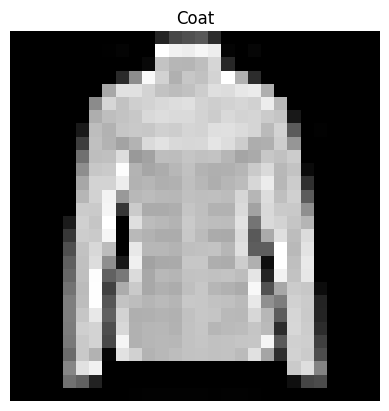

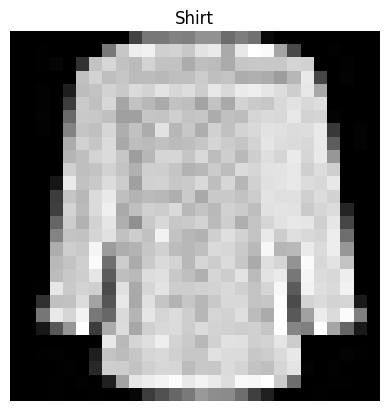

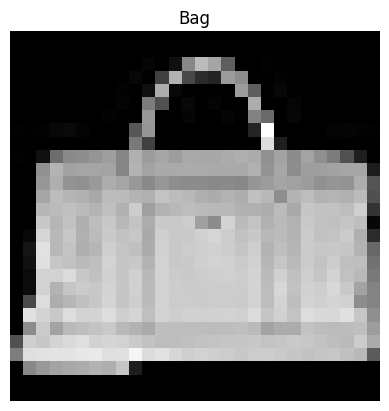

In [18]:
# load train and test data
transform = transforms.ToTensor()
train_data = datasets.FashionMNIST("data", train=True , download=True, transform=transform)
test_data  = datasets.FashionMNIST("data", train=False, download=True, transform=transform)

batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(train_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print("Shape of X [N, C, H, W]: ", X.shape)
    print("Shape of y: ", y.shape, y.dtype)
    break

print(f"Training set: {len(train_data)} images shape {train_data[0][0].shape}")

# Extract three random distinct-class samples
idxs, labels, imgs = [], [], []
while len(labels) < 3:
    i = np.random.randint(0, len(train_data))
    img, lab = train_data[i]
    if lab not in labels:
        idxs.append(i); labels.append(lab); imgs.append(img)

for img, lab in zip(imgs, labels):
    plt.figure()
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[lab])
    plt.axis("off")
    plt.show()


## Q1.2


Learning rate: 1 

Epoch 1/10
  [Batch 000] loss: 2.304520  (0/60000)
  [Batch 100] loss: 3.745166  (6400/60000)
  [Batch 200] loss: 1.867681  (12800/60000)
  [Batch 300] loss: 1.764732  (19200/60000)
  [Batch 400] loss: 1.871515  (25600/60000)
  [Batch 500] loss: 1.558125  (32000/60000)
  [Batch 600] loss: 1.648953  (38400/60000)
  [Batch 700] loss: 1.726286  (44800/60000)
  [Batch 800] loss: 1.694548  (51200/60000)
  [Batch 900] loss: 1.685721  (57600/60000)
Epoch 2/10
  [Batch 000] loss: 1.762296  (0/60000)
  [Batch 100] loss: 1.758461  (6400/60000)
  [Batch 200] loss: 1.814194  (12800/60000)
  [Batch 300] loss: 1.814709  (19200/60000)
  [Batch 400] loss: 1.648760  (25600/60000)
  [Batch 500] loss: 1.754205  (32000/60000)
  [Batch 600] loss: 1.694471  (38400/60000)
  [Batch 700] loss: 1.826227  (44800/60000)
  [Batch 800] loss: 1.692935  (51200/60000)
  [Batch 900] loss: 1.778063  (57600/60000)
Epoch 3/10
  [Batch 000] loss: 1.969276  (0/60000)
  [Batch 100] loss: 1.719424  (6400/60

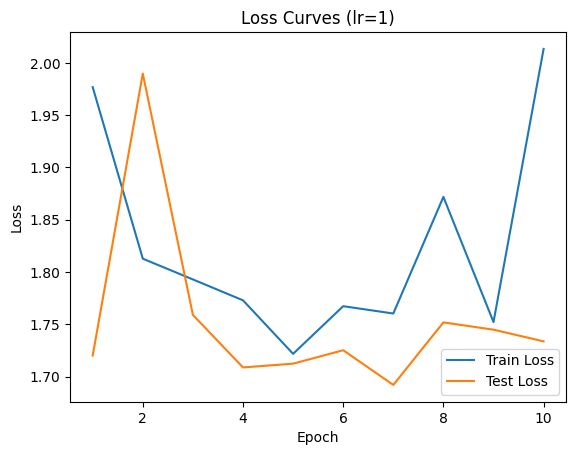

Learning rate: 0.1 

Epoch 1/10
  [Batch 000] loss: 2.316946  (0/60000)
  [Batch 100] loss: 0.898326  (6400/60000)
  [Batch 200] loss: 0.574954  (12800/60000)
  [Batch 300] loss: 0.700685  (19200/60000)
  [Batch 400] loss: 0.597572  (25600/60000)
  [Batch 500] loss: 0.510775  (32000/60000)
  [Batch 600] loss: 0.536074  (38400/60000)
  [Batch 700] loss: 0.597469  (44800/60000)
  [Batch 800] loss: 0.590598  (51200/60000)
  [Batch 900] loss: 0.458736  (57600/60000)
Epoch 2/10
  [Batch 000] loss: 0.423019  (0/60000)
  [Batch 100] loss: 0.444391  (6400/60000)
  [Batch 200] loss: 0.376141  (12800/60000)
  [Batch 300] loss: 0.437111  (19200/60000)
  [Batch 400] loss: 0.407166  (25600/60000)
  [Batch 500] loss: 0.448467  (32000/60000)
  [Batch 600] loss: 0.410118  (38400/60000)
  [Batch 700] loss: 0.511516  (44800/60000)
  [Batch 800] loss: 0.491207  (51200/60000)
  [Batch 900] loss: 0.430814  (57600/60000)
Epoch 3/10
  [Batch 000] loss: 0.320760  (0/60000)
  [Batch 100] loss: 0.364480  (6400/

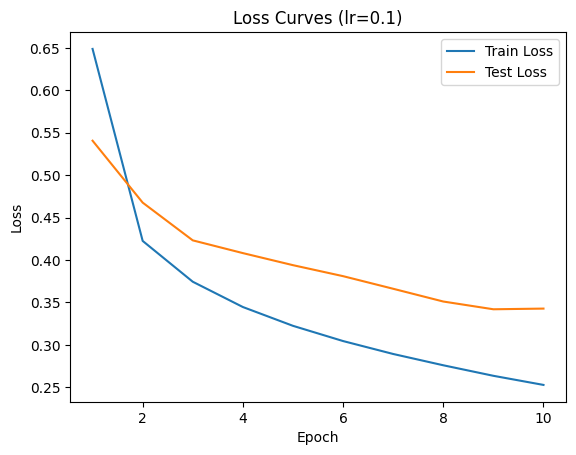

Learning rate: 0.01 

Epoch 1/10
  [Batch 000] loss: 2.314329  (0/60000)
  [Batch 100] loss: 2.166001  (6400/60000)
  [Batch 200] loss: 1.809368  (12800/60000)
  [Batch 300] loss: 1.501394  (19200/60000)
  [Batch 400] loss: 1.130784  (25600/60000)
  [Batch 500] loss: 1.042473  (32000/60000)
  [Batch 600] loss: 0.998837  (38400/60000)
  [Batch 700] loss: 0.864243  (44800/60000)
  [Batch 800] loss: 0.868004  (51200/60000)
  [Batch 900] loss: 0.807506  (57600/60000)
Epoch 2/10
  [Batch 000] loss: 0.795473  (0/60000)
  [Batch 100] loss: 0.843838  (6400/60000)
  [Batch 200] loss: 0.589319  (12800/60000)
  [Batch 300] loss: 0.784176  (19200/60000)
  [Batch 400] loss: 0.661015  (25600/60000)
  [Batch 500] loss: 0.642479  (32000/60000)
  [Batch 600] loss: 0.719374  (38400/60000)
  [Batch 700] loss: 0.685976  (44800/60000)
  [Batch 800] loss: 0.695574  (51200/60000)
  [Batch 900] loss: 0.633607  (57600/60000)
Epoch 3/10
  [Batch 000] loss: 0.562946  (0/60000)
  [Batch 100] loss: 0.647219  (6400

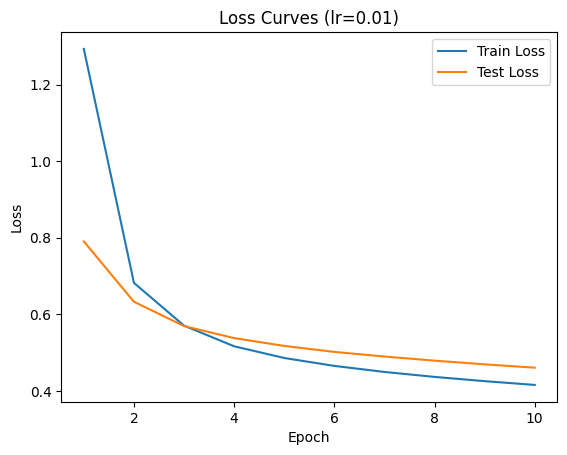

Learning rate: 0.001 

Epoch 1/10
  [Batch 000] loss: 2.291207  (0/60000)
  [Batch 100] loss: 2.282664  (6400/60000)
  [Batch 200] loss: 2.261561  (12800/60000)
  [Batch 300] loss: 2.259733  (19200/60000)
  [Batch 400] loss: 2.240708  (25600/60000)
  [Batch 500] loss: 2.211135  (32000/60000)
  [Batch 600] loss: 2.221413  (38400/60000)
  [Batch 700] loss: 2.180183  (44800/60000)
  [Batch 800] loss: 2.168982  (51200/60000)
  [Batch 900] loss: 2.134594  (57600/60000)
Epoch 2/10
  [Batch 000] loss: 2.143305  (0/60000)
  [Batch 100] loss: 2.140811  (6400/60000)
  [Batch 200] loss: 2.076955  (12800/60000)
  [Batch 300] loss: 2.097295  (19200/60000)
  [Batch 400] loss: 2.043799  (25600/60000)
  [Batch 500] loss: 1.981938  (32000/60000)
  [Batch 600] loss: 2.014280  (38400/60000)
  [Batch 700] loss: 1.924833  (44800/60000)
  [Batch 800] loss: 1.920683  (51200/60000)
  [Batch 900] loss: 1.848292  (57600/60000)
Epoch 3/10
  [Batch 000] loss: 1.886089  (0/60000)
  [Batch 100] loss: 1.860739  (640

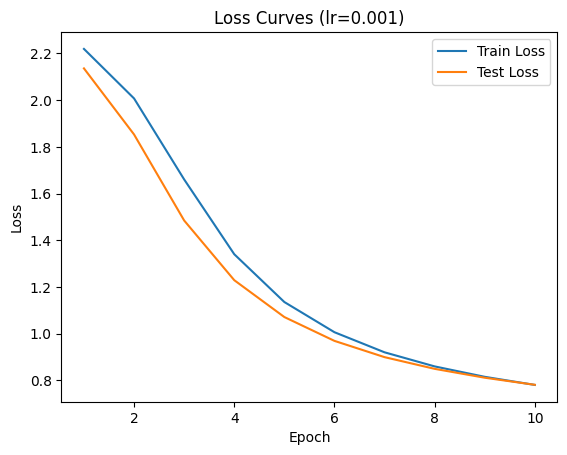

Final test accuracies:
  LR=1      : 19.97%
  LR=0.1    : 87.53%
  LR=0.01   : 83.56%
  LR=0.001  : 71.35%


In [4]:
# Parameters
loss_fn = nn.CrossEntropyLoss()
learning_rates = [1, 1e-1, 1e-2, 1e-3]
epochs = 10

# Experiments
results = {}
for lr in learning_rates:
    print(f"Learning rate: {lr} \n")
    model = NeuralNetwork().to(device)
    # model.apply(init_weights)
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)

    train_losses, test_losses, test_accs = [], [], []
    for epoch in range(1, epochs + 1):
        print(f"Epoch {epoch}/{epochs}")
        train_loss = train(train_dataloader, model, loss_fn, optimizer)
        acc, test_loss = test(test_dataloader, model, loss_fn)

        train_losses.append(train_loss)
        test_losses.append(test_loss)
        test_accs.append(acc)

    plot_train_test_loss(train_losses, test_losses, test_accs, lr)
    results[lr] = test_accs[-1]

# Final result
print("Final test accuracies:")
for lr, acc in results.items():
    print(f"  LR={lr:<7}: {acc*100:.2f}%")

## Q1.3

Learning rate: 1 

Epoch 1/30
  [Batch 000] loss: 2.301673  (0/60000)
  [Batch 100] loss: 2.180399  (6400/60000)
  [Batch 200] loss: 1.906144  (12800/60000)
  [Batch 300] loss: 1.751939  (19200/60000)
  [Batch 400] loss: 1.592444  (25600/60000)
  [Batch 500] loss: 1.535240  (32000/60000)
  [Batch 600] loss: 1.259818  (38400/60000)
  [Batch 700] loss: 2.105487  (44800/60000)
  [Batch 800] loss: 1.609622  (51200/60000)
  [Batch 900] loss: 1.257706  (57600/60000)
Epoch 2/30
  [Batch 000] loss: 1.567218  (0/60000)
  [Batch 100] loss: 1.402401  (6400/60000)
  [Batch 200] loss: 1.450479  (12800/60000)
  [Batch 300] loss: 1.292953  (19200/60000)
  [Batch 400] loss: 1.169132  (25600/60000)
  [Batch 500] loss: 1.325012  (32000/60000)
  [Batch 600] loss: 1.571929  (38400/60000)
  [Batch 700] loss: 1.448727  (44800/60000)
  [Batch 800] loss: 1.522715  (51200/60000)
  [Batch 900] loss: 1.710152  (57600/60000)
Epoch 3/30
  [Batch 000] loss: 1.495112  (0/60000)
  [Batch 100] loss: 1.435577  (6400/60

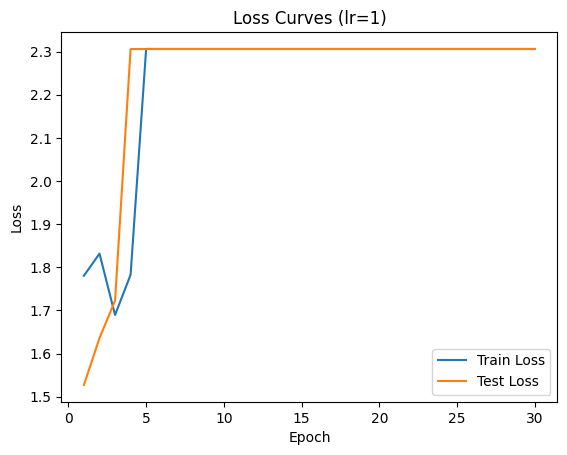

Final test accuracy for LR=1: 10.00%


In [5]:
# Parameters
loss_fn = nn.CrossEntropyLoss()
learning_rate = 1
epochs = 30

# Experiment for learning rate = 1
print(f"Learning rate: {learning_rate} \n")
model = NeuralNetwork().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

train_losses, test_losses, test_accs = [], [], []
for epoch in range(1, epochs + 1):
    print(f"Epoch {epoch}/{epochs}")
    train_loss = train(train_dataloader, model, loss_fn, optimizer)
    acc, test_loss = test(test_dataloader, model, loss_fn)

    train_losses.append(train_loss)
    test_losses.append(test_loss)
    test_accs.append(acc)

plot_train_test_loss(train_losses, test_losses, test_accs, learning_rate)
result = test_accs[-1]

# Final result for learning rate = 1
print(f"Final test accuracy for LR={learning_rate}: {result*100:.2f}%")


Learning rate: 0.1 

Epoch 1/30
  [Batch 000] loss: 2.304804  (0/60000)
  [Batch 100] loss: 0.895236  (6400/60000)
  [Batch 200] loss: 0.573996  (12800/60000)
  [Batch 300] loss: 0.709345  (19200/60000)
  [Batch 400] loss: 0.597106  (25600/60000)
  [Batch 500] loss: 0.516124  (32000/60000)
  [Batch 600] loss: 0.545407  (38400/60000)
  [Batch 700] loss: 0.605605  (44800/60000)
  [Batch 800] loss: 0.616153  (51200/60000)
  [Batch 900] loss: 0.457095  (57600/60000)
Epoch 2/30
  [Batch 000] loss: 0.436648  (0/60000)
  [Batch 100] loss: 0.438896  (6400/60000)
  [Batch 200] loss: 0.366696  (12800/60000)
  [Batch 300] loss: 0.441557  (19200/60000)
  [Batch 400] loss: 0.427104  (25600/60000)
  [Batch 500] loss: 0.449212  (32000/60000)
  [Batch 600] loss: 0.418601  (38400/60000)
  [Batch 700] loss: 0.506757  (44800/60000)
  [Batch 800] loss: 0.512055  (51200/60000)
  [Batch 900] loss: 0.420511  (57600/60000)
Epoch 3/30
  [Batch 000] loss: 0.336738  (0/60000)
  [Batch 100] loss: 0.360954  (6400/

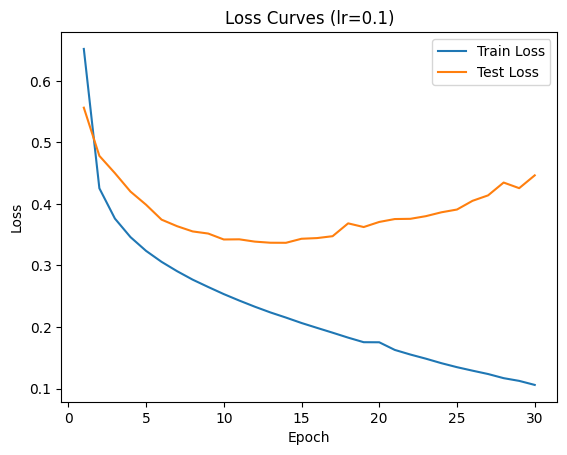

Final test accuracy for LR=0.1: 86.85%


In [6]:
# Parameters
loss_fn = nn.CrossEntropyLoss()
learning_rate = 1e-1
epochs = 30

# Experiment for learning rate = 1
print(f"Learning rate: {learning_rate} \n")
model = NeuralNetwork().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

train_losses, test_losses, test_accs = [], [], []
for epoch in range(1, epochs + 1):
    print(f"Epoch {epoch}/{epochs}")
    train_loss = train(train_dataloader, model, loss_fn, optimizer)
    acc, test_loss = test(test_dataloader, model, loss_fn)

    train_losses.append(train_loss)
    test_losses.append(test_loss)
    test_accs.append(acc)

plot_train_test_loss(train_losses, test_losses, test_accs, learning_rate)
result = test_accs[-1]

# Final result for learning rate = 1
print(f"Final test accuracy for LR={learning_rate}: {result*100:.2f}%")


Learning rate: 0.01 

Epoch 1/30
  [Batch 000] loss: 2.297597  (0/60000)
  [Batch 100] loss: 2.145239  (6400/60000)
  [Batch 200] loss: 1.779472  (12800/60000)
  [Batch 300] loss: 1.490282  (19200/60000)
  [Batch 400] loss: 1.140645  (25600/60000)
  [Batch 500] loss: 1.041433  (32000/60000)
  [Batch 600] loss: 1.005681  (38400/60000)
  [Batch 700] loss: 0.874601  (44800/60000)
  [Batch 800] loss: 0.868524  (51200/60000)
  [Batch 900] loss: 0.806097  (57600/60000)
Epoch 2/30
  [Batch 000] loss: 0.799003  (0/60000)
  [Batch 100] loss: 0.852552  (6400/60000)
  [Batch 200] loss: 0.588857  (12800/60000)
  [Batch 300] loss: 0.783328  (19200/60000)
  [Batch 400] loss: 0.665234  (25600/60000)
  [Batch 500] loss: 0.639718  (32000/60000)
  [Batch 600] loss: 0.719117  (38400/60000)
  [Batch 700] loss: 0.690038  (44800/60000)
  [Batch 800] loss: 0.708284  (51200/60000)
  [Batch 900] loss: 0.628871  (57600/60000)
Epoch 3/30
  [Batch 000] loss: 0.560225  (0/60000)
  [Batch 100] loss: 0.652057  (6400

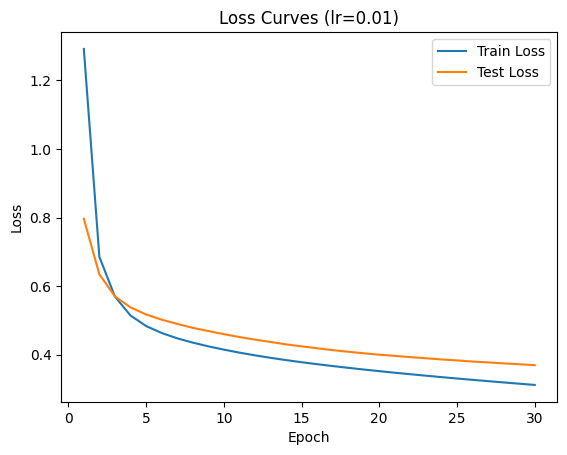

Final test accuracy for LR=0.01: 86.88%


In [7]:
# Parameters
loss_fn = nn.CrossEntropyLoss()
learning_rate = 1e-2
epochs = 30

# Experiment for learning rate = 1
print(f"Learning rate: {learning_rate} \n")
model = NeuralNetwork().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

train_losses, test_losses, test_accs = [], [], []
for epoch in range(1, epochs + 1):
    print(f"Epoch {epoch}/{epochs}")
    train_loss = train(train_dataloader, model, loss_fn, optimizer)
    acc, test_loss = test(test_dataloader, model, loss_fn)

    train_losses.append(train_loss)
    test_losses.append(test_loss)
    test_accs.append(acc)

plot_train_test_loss(train_losses, test_losses, test_accs, learning_rate)
result = test_accs[-1]

# Final result for learning rate = 1
print(f"Final test accuracy for LR={learning_rate}: {result*100:.2f}%")


Learning rate: 0.001 

Epoch 1/30
  [Batch 000] loss: 2.303828  (0/60000)
  [Batch 100] loss: 2.294583  (6400/60000)
  [Batch 200] loss: 2.276409  (12800/60000)
  [Batch 300] loss: 2.283519  (19200/60000)
  [Batch 400] loss: 2.256564  (25600/60000)
  [Batch 500] loss: 2.231722  (32000/60000)
  [Batch 600] loss: 2.242526  (38400/60000)
  [Batch 700] loss: 2.208930  (44800/60000)
  [Batch 800] loss: 2.205115  (51200/60000)
  [Batch 900] loss: 2.176370  (57600/60000)
Epoch 2/30
  [Batch 000] loss: 2.183001  (0/60000)
  [Batch 100] loss: 2.172985  (6400/60000)
  [Batch 200] loss: 2.119371  (12800/60000)
  [Batch 300] loss: 2.146827  (19200/60000)
  [Batch 400] loss: 2.089874  (25600/60000)
  [Batch 500] loss: 2.027265  (32000/60000)
  [Batch 600] loss: 2.064234  (38400/60000)
  [Batch 700] loss: 1.980165  (44800/60000)
  [Batch 800] loss: 1.986772  (51200/60000)
  [Batch 900] loss: 1.924709  (57600/60000)
Epoch 3/30
  [Batch 000] loss: 1.950836  (0/60000)
  [Batch 100] loss: 1.924830  (640

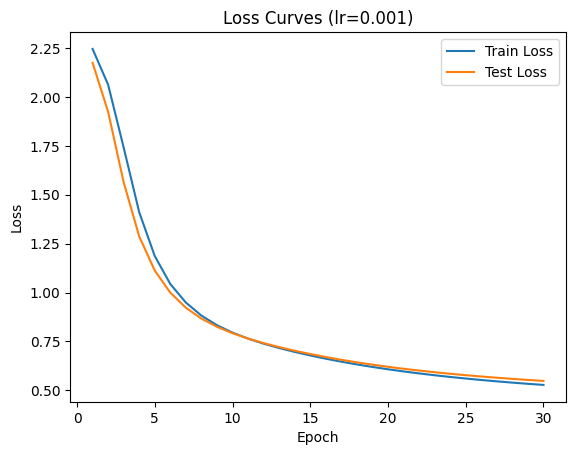

Final test accuracy for LR=0.001: 80.85%


In [8]:
# Parameters
loss_fn = nn.CrossEntropyLoss()
learning_rate = 1e-3
epochs = 30

# Experiment for learning rate = 1
print(f"Learning rate: {learning_rate} \n")
model = NeuralNetwork().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

train_losses, test_losses, test_accs = [], [], []
for epoch in range(1, epochs + 1):
    print(f"Epoch {epoch}/{epochs}")
    train_loss = train(train_dataloader, model, loss_fn, optimizer)
    acc, test_loss = test(test_dataloader, model, loss_fn)

    train_losses.append(train_loss)
    test_losses.append(test_loss)
    test_accs.append(acc)

plot_train_test_loss(train_losses, test_losses, test_accs, learning_rate)
result = test_accs[-1]

# Final result for learning rate = 1
print(f"Final test accuracy for LR={learning_rate}: {result*100:.2f}%")


## Q1.5

In [19]:
class FlexibleNet(nn.Module):
    def __init__(self, hidden_units):
        super().__init__()
        layers = [nn.Flatten()]
        input_size = 28 * 28
        for h in hidden_units:
            layers += [nn.Linear(input_size, h), nn.ReLU()]
            input_size = h
        layers.append(nn.Linear(input_size, 10))
        self.net = nn.Sequential(*layers)

    def forward(self, x):
        return self.net(x)
    
def count_params(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

In [14]:
wide_net_layers = [1024, 1024]
deep_net_layers = [512, 512, 512, 512]

base_net = NeuralNetwork().to(device)
wide_net = FlexibleNet(wide_net_layers).to(device)
deep_net = FlexibleNet(deep_net_layers).to(device)


print(f"Base net parameters: {count_params(base_net)}")
print(f"Wide net parameters: {count_params(wide_net)}")
print(f"Deep net parameters: {count_params(deep_net)}")

Base net parameters: 669706
Wide net parameters: 1863690
Deep net parameters: 1195018


Epoch 1/30
  [Batch 000] loss: 2.303660  (0/60000)
  [Batch 100] loss: 2.176378  (6400/60000)
  [Batch 200] loss: 1.831413  (12800/60000)
  [Batch 300] loss: 1.540735  (19200/60000)
  [Batch 400] loss: 1.173211  (25600/60000)
  [Batch 500] loss: 1.068853  (32000/60000)
  [Batch 600] loss: 1.009820  (38400/60000)
  [Batch 700] loss: 0.884349  (44800/60000)
  [Batch 800] loss: 0.877845  (51200/60000)
  [Batch 900] loss: 0.806081  (57600/60000)
  [Batch 000] loss: 2.294289  (0/60000)
  [Batch 100] loss: 2.108594  (6400/60000)
  [Batch 200] loss: 1.667768  (12800/60000)
  [Batch 300] loss: 1.397994  (19200/60000)
  [Batch 400] loss: 1.054158  (25600/60000)
  [Batch 500] loss: 0.971647  (32000/60000)
  [Batch 600] loss: 0.953923  (38400/60000)
  [Batch 700] loss: 0.826362  (44800/60000)
  [Batch 800] loss: 0.835680  (51200/60000)
  [Batch 900] loss: 0.786859  (57600/60000)
  [Batch 000] loss: 2.300710  (0/60000)
  [Batch 100] loss: 2.294351  (6400/60000)
  [Batch 200] loss: 2.283535  (12800

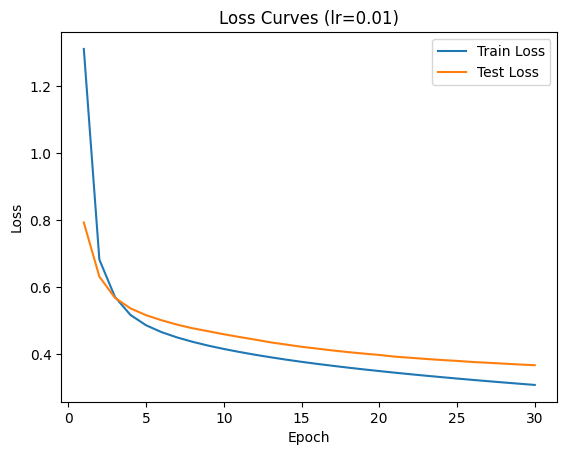

Wide net
Best accuracy = 86.98% at epoch 30



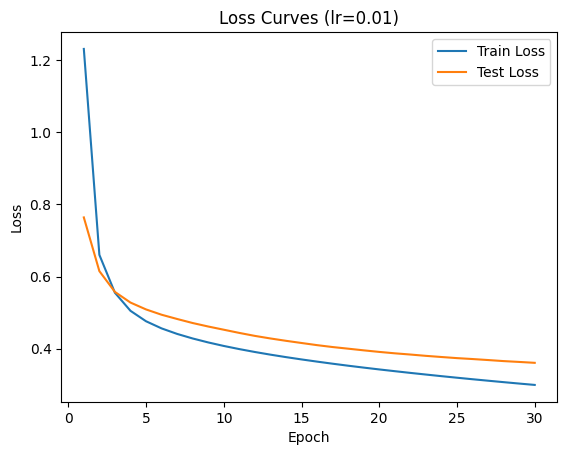

Deep net
Best accuracy = 86.60% at epoch 30



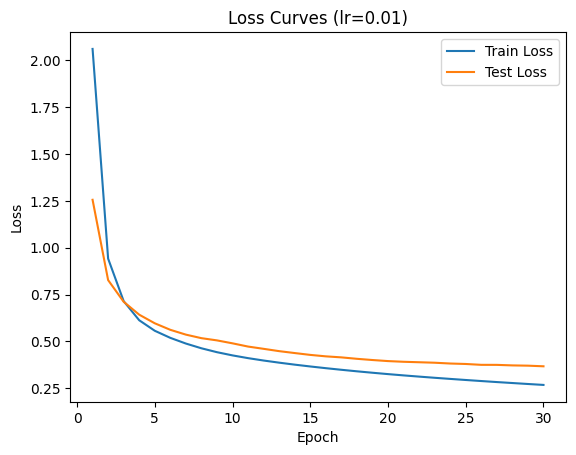

Final test accuracies:
Base net: 86.87%
Wide net: 86.98%
Deep net: 86.60%


In [15]:
# Experiment
learning_rate = 1e-2
epochs = 30

# Base net
base_net = NeuralNetwork().to(device)
wide_net = FlexibleNet(wide_net_layers).to(device)
deep_net = FlexibleNet(deep_net_layers).to(device)

# Optimizers
base_optimizer = torch.optim.SGD(base_net.parameters(), lr=learning_rate)
wide_optimizer = torch.optim.SGD(wide_net.parameters(), lr=learning_rate)
deep_optimizer = torch.optim.SGD(deep_net.parameters(), lr=learning_rate)

# Training loop
base_train_losses, base_test_losses, base_test_accs = [], [], []
wide_train_losses, wide_test_losses, wide_test_accs = [], [], []
deep_train_losses, deep_test_losses, deep_test_accs = [], [], []

for epoch in range(1, epochs + 1):
    print(f"Epoch {epoch}/{epochs}")
    
    # Base net
    base_train_loss = train(train_dataloader, base_net, loss_fn, base_optimizer)

    # Wide net
    wide_train_loss = train(train_dataloader, wide_net, loss_fn, wide_optimizer)

    # Deep net
    deep_train_loss = train(train_dataloader, deep_net, loss_fn, deep_optimizer)
    
    # Test loop
    base_acc, base_test_loss = test(test_dataloader, base_net, loss_fn)
    wide_acc, wide_test_loss = test(test_dataloader, wide_net, loss_fn)
    deep_acc, deep_test_loss = test(test_dataloader, deep_net, loss_fn)
    
    # Record results
    base_train_losses.append(base_train_loss)
    base_test_losses.append(base_test_loss)
    base_test_accs.append(base_acc)
    
    wide_train_losses.append(wide_train_loss)
    wide_test_losses.append(wide_test_loss)
    wide_test_accs.append(wide_acc)
    
    deep_train_losses.append(deep_train_loss)
    deep_test_losses.append(deep_test_loss)
    deep_test_accs.append(deep_acc)

# Plot results
print("Base net")
plot_train_test_loss(base_train_losses, base_test_losses, base_test_accs, learning_rate)
print("Wide net")
plot_train_test_loss(wide_train_losses, wide_test_losses, wide_test_accs, learning_rate)
print("Deep net")
plot_train_test_loss(deep_train_losses, deep_test_losses, deep_test_accs, learning_rate)

# Final results
print("Final test accuracies:")
print(f"Base net: {base_test_accs[-1]*100:.2f}%")
print(f"Wide net: {wide_test_accs[-1]*100:.2f}%")
print(f"Deep net: {deep_test_accs[-1]*100:.2f}%")




## Q1.6


In [20]:
from numpy import mean

def train_with_grads(dataloader, model, loss_fn, optimizer):
    model.train()
    mean_gradients = []
    total = len(dataloader.dataset)

    for batch_idx, (X, y) in enumerate(dataloader):

        X, y = X.to(device), y.to(device)

        optimizer.zero_grad()
        preds = model(X)
        loss = loss_fn(preds, y)
        loss.backward()
        optimizer.step()

        # collect all grads into one vector, compute its mean
        grads = torch.cat([p.grad.view(-1)
                           for p in model.parameters() if p.grad is not None])
        mean_gradients.append(grads.mean().item())

        if batch_idx % 500 == 0:
            seen = batch_idx * dataloader.batch_size
            print(f"  [Batch {batch_idx:03d}] mean grad: {mean_gradients[-1]:.6f}  ({seen}/{total})")

    return mean_gradients

Epoch 1/15
  [Batch 000] mean grad: -0.000001  (0/60000)
  [Batch 500] mean grad: -0.000088  (32000/60000)
Epoch 2/15
  [Batch 000] mean grad: -0.000103  (0/60000)
  [Batch 500] mean grad: -0.000182  (32000/60000)
Epoch 3/15
  [Batch 000] mean grad: -0.000130  (0/60000)
  [Batch 500] mean grad: -0.000197  (32000/60000)
Epoch 4/15
  [Batch 000] mean grad: -0.000113  (0/60000)
  [Batch 500] mean grad: -0.000143  (32000/60000)
Epoch 5/15
  [Batch 000] mean grad: -0.000093  (0/60000)
  [Batch 500] mean grad: -0.000098  (32000/60000)
Epoch 6/15
  [Batch 000] mean grad: -0.000081  (0/60000)
  [Batch 500] mean grad: -0.000077  (32000/60000)
Epoch 7/15
  [Batch 000] mean grad: -0.000071  (0/60000)
  [Batch 500] mean grad: -0.000063  (32000/60000)
Epoch 8/15
  [Batch 000] mean grad: -0.000065  (0/60000)
  [Batch 500] mean grad: -0.000050  (32000/60000)
Epoch 9/15
  [Batch 000] mean grad: -0.000059  (0/60000)
  [Batch 500] mean grad: -0.000041  (32000/60000)
Epoch 10/15
  [Batch 000] mean grad: 

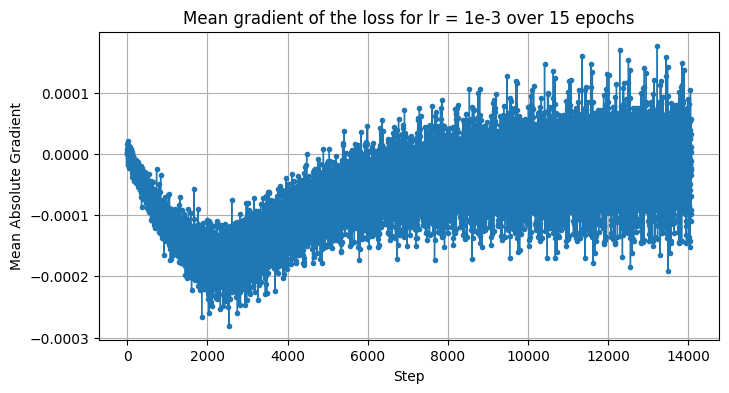

In [22]:
model = NeuralNetwork().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)
loss_fn = nn.CrossEntropyLoss()

mean_grads = []
for epoch in range(15):
    print(f"Epoch {epoch+1}/15")
    epoch_mean_grads = train_with_grads(train_dataloader, model, loss_fn, optimizer)
    mean_grads.extend(epoch_mean_grads)

plt.figure(figsize=(8,4))
plt.plot(mean_grads, marker='.', linewidth=1)
plt.title("Mean gradient of the loss for lr = 1e-3 over 15 epochs")
plt.xlabel("Step")
plt.ylabel("Mean Absolute Gradient")
plt.grid(True)
plt.show()

Epoch 1/15
  [Batch 000] mean grad: 0.000011  (0/60000)
  [Batch 500] mean grad: -0.000060  (32000/60000)
Epoch 2/15
  [Batch 000] mean grad: -0.000036  (0/60000)
  [Batch 500] mean grad: 0.000034  (32000/60000)
Epoch 3/15
  [Batch 000] mean grad: -0.000000  (0/60000)
  [Batch 500] mean grad: 0.000056  (32000/60000)
Epoch 4/15
  [Batch 000] mean grad: 0.000023  (0/60000)
  [Batch 500] mean grad: 0.000069  (32000/60000)
Epoch 5/15
  [Batch 000] mean grad: 0.000024  (0/60000)
  [Batch 500] mean grad: 0.000074  (32000/60000)
Epoch 6/15
  [Batch 000] mean grad: 0.000017  (0/60000)
  [Batch 500] mean grad: 0.000084  (32000/60000)
Epoch 7/15
  [Batch 000] mean grad: 0.000011  (0/60000)
  [Batch 500] mean grad: 0.000101  (32000/60000)
Epoch 8/15
  [Batch 000] mean grad: 0.000005  (0/60000)
  [Batch 500] mean grad: 0.000105  (32000/60000)
Epoch 9/15
  [Batch 000] mean grad: -0.000004  (0/60000)
  [Batch 500] mean grad: 0.000119  (32000/60000)
Epoch 10/15
  [Batch 000] mean grad: -0.000010  (0/

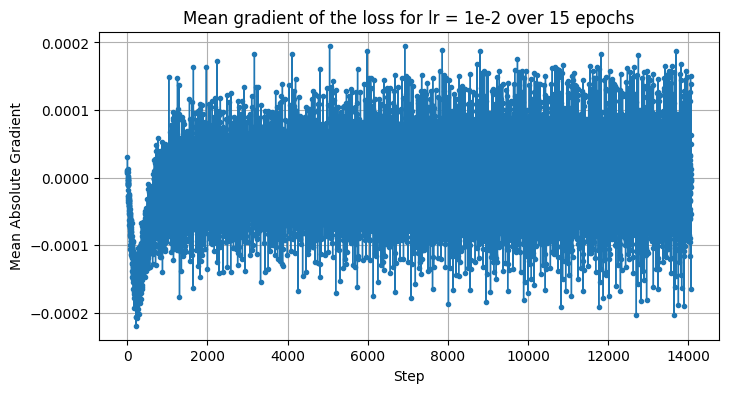

In [23]:
model = NeuralNetwork().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)
loss_fn = nn.CrossEntropyLoss()

mean_grads = []
for epoch in range(15):
    print(f"Epoch {epoch+1}/15")
    epoch_mean_grads = train_with_grads(train_dataloader, model, loss_fn, optimizer)
    mean_grads.extend(epoch_mean_grads)

plt.figure(figsize=(8,4))
plt.plot(mean_grads, marker='.', linewidth=1)
plt.title("Mean gradient of the loss for lr = 1e-2 over 15 epochs")
plt.xlabel("Step")
plt.ylabel("Mean Absolute Gradient")
plt.grid(True)
plt.show()

Epoch 1/15
  [Batch 000] mean grad: 0.000016  (0/60000)
  [Batch 500] mean grad: -0.000004  (32000/60000)
Epoch 2/15
  [Batch 000] mean grad: -0.000119  (0/60000)
  [Batch 500] mean grad: 0.000070  (32000/60000)
Epoch 3/15
  [Batch 000] mean grad: -0.000100  (0/60000)
  [Batch 500] mean grad: 0.000086  (32000/60000)
Epoch 4/15
  [Batch 000] mean grad: -0.000083  (0/60000)
  [Batch 500] mean grad: 0.000104  (32000/60000)
Epoch 5/15
  [Batch 000] mean grad: -0.000079  (0/60000)
  [Batch 500] mean grad: 0.000103  (32000/60000)
Epoch 6/15
  [Batch 000] mean grad: -0.000063  (0/60000)
  [Batch 500] mean grad: 0.000114  (32000/60000)
Epoch 7/15
  [Batch 000] mean grad: -0.000071  (0/60000)
  [Batch 500] mean grad: 0.000120  (32000/60000)
Epoch 8/15
  [Batch 000] mean grad: -0.000079  (0/60000)
  [Batch 500] mean grad: 0.000096  (32000/60000)
Epoch 9/15
  [Batch 000] mean grad: -0.000073  (0/60000)
  [Batch 500] mean grad: 0.000093  (32000/60000)
Epoch 10/15
  [Batch 000] mean grad: -0.000073

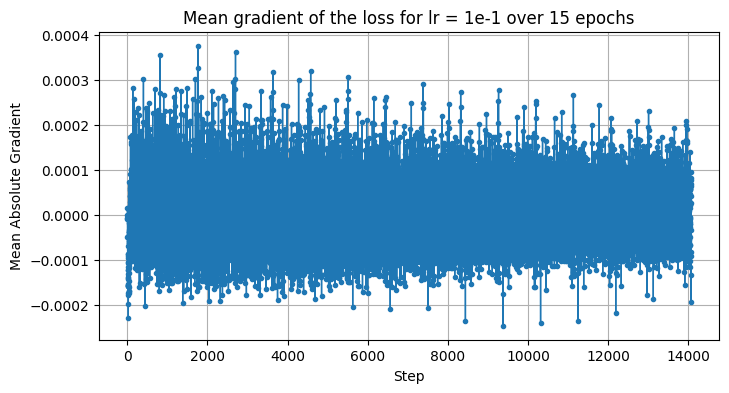

In [24]:
model = NeuralNetwork().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-1)
loss_fn = nn.CrossEntropyLoss()

mean_grads = []
for epoch in range(15):
    print(f"Epoch {epoch+1}/15")
    epoch_mean_grads = train_with_grads(train_dataloader, model, loss_fn, optimizer)
    mean_grads.extend(epoch_mean_grads)

# Plot first 100 steps
plt.figure(figsize=(8,4))
plt.plot(mean_grads, marker='.', linewidth=1)
plt.title("Mean gradient of the loss for lr = 1e-1 over 15 epochs")
plt.xlabel("Step")
plt.ylabel("Mean Absolute Gradient")
plt.grid(True)
plt.show()

## Q1.7


In [11]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.convolution_stack = nn.Sequential(
            nn.Conv2d(1, 6, kernel_size=5),  
            nn.ReLU(),
            nn.MaxPool2d(2,2),                   
            nn.Conv2d(6, 16, kernel_size=5), 
            nn.ReLU(),
            nn.MaxPool2d(2,2),                   
        )
        self.flatten = nn.Flatten()
        self.linear_stack = nn.Sequential(
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128,64),
            nn.ReLU(),
            nn.Linear(64, 10)
        )
    
    def forward(self, x):
        x = self.convolution_stack(x)
        x = self.flatten(x)
        x = self.linear_stack(x)
        return x


cnn_model = CNN().to(device)
print("Total parameters: ", count_params(cnn_model))

Total parameters:  44374


Epoch 1/30
  [Batch 000] loss: 2.319222  (0/60000)
  [Batch 100] loss: 2.320369  (6400/60000)
  [Batch 200] loss: 2.308376  (12800/60000)
  [Batch 300] loss: 2.290546  (19200/60000)
  [Batch 400] loss: 2.297048  (25600/60000)
  [Batch 500] loss: 2.277369  (32000/60000)
  [Batch 600] loss: 2.258766  (38400/60000)
  [Batch 700] loss: 2.205157  (44800/60000)
  [Batch 800] loss: 1.993607  (51200/60000)
  [Batch 900] loss: 1.307252  (57600/60000)
Epoch 2/30
  [Batch 000] loss: 1.247804  (0/60000)
  [Batch 100] loss: 1.097389  (6400/60000)
  [Batch 200] loss: 0.823539  (12800/60000)
  [Batch 300] loss: 0.989792  (19200/60000)
  [Batch 400] loss: 0.814363  (25600/60000)
  [Batch 500] loss: 0.846072  (32000/60000)
  [Batch 600] loss: 0.830532  (38400/60000)
  [Batch 700] loss: 0.811034  (44800/60000)
  [Batch 800] loss: 0.703085  (51200/60000)
  [Batch 900] loss: 0.782062  (57600/60000)
Epoch 3/30
  [Batch 000] loss: 0.710415  (0/60000)
  [Batch 100] loss: 0.775468  (6400/60000)
  [Batch 200] 

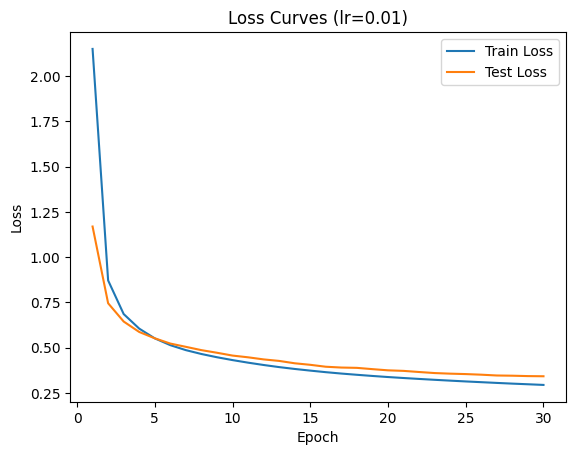

Final test accuracy for CNN model at LR=0.01: 87.79%


In [104]:
# training set up
epochs = 30
lr = 1e-2
optimizer = torch.optim.SGD(params=cnn_model.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()

# training loop
train_losses, test_losses, test_accs = [], [], []
for epoch in range(1, epochs + 1):
    print(f"Epoch {epoch}/{epochs}")
    train_loss = train(train_dataloader, cnn_model, loss_fn, optimizer)
    acc, test_loss = test(test_dataloader, cnn_model, loss_fn)

    train_losses.append(train_loss)
    test_losses.append(test_loss)
    test_accs.append(acc)

# plot results
plot_train_test_loss(train_losses, test_losses, test_accs, learning_rate)
result = test_accs[-1]
    
print(f"Final test accuracy for CNN model at LR={learning_rate}: {result*100:.2f}%")


# Question 2

In [13]:
class FlexibleNetActivation(nn.Module):
    def __init__(self, hidden_units, activation_fn=nn.ReLU):
        super().__init__()
        layers = [nn.Flatten()]
        input_size = 28 * 28
        for h in hidden_units:
            layers += [nn.Linear(input_size, h), activation_fn()]
            input_size = h
        layers.append(nn.Linear(input_size, 10))
        self.net = nn.Sequential(*layers)

    def forward(self, x):
        return self.net(x)
    
def train_with_loss_and_grads(dataloader, model, loss_fn, optimizer, log_interval=100):
    model.train()
    batch_losses = []
    mean_gradients = []
    total = len(dataloader.dataset)

    for batch_idx, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        optimizer.zero_grad()
        preds = model(X)
        loss = loss_fn(preds, y)
        loss.backward()
        optimizer.step()

        # Record loss and gradients
        batch_losses.append(loss.item())
        grads = torch.cat([p.grad.view(-1)
                           for p in model.parameters() if p.grad is not None])
        mean_gradients.append(grads.mean().item())

        # Log both metrics at intervals
        if batch_idx % log_interval == 0:
            seen = batch_idx * dataloader.batch_size
            print(f"[Batch {batch_idx:03d}] loss: {loss:.6f}, mean grad: {mean_gradients[-1]:.6f}  ({seen}/{total})")

    avg_loss = np.mean(batch_losses)
    return avg_loss, mean_gradients


In [14]:
# Compare ReLU, Sigmoid and Tanh without Xavier initialization
lr = 0.01
epochs = 30
hidden_lay = [256, 512, 64]
criterion = nn.CrossEntropyLoss()

model_relu = FlexibleNetActivation(hidden_units=hidden_lay, activation_fn=nn.ReLU)
model_sigmoid = FlexibleNetActivation(hidden_units=hidden_lay, activation_fn=nn.Sigmoid)
model_tanh = FlexibleNetActivation(hidden_units=hidden_lay, activation_fn=nn.Tanh)

optimizer_relu = torch.optim.SGD(params=model_relu.parameters(), lr=lr)
optimizer_sigmoid = torch.optim.SGD(params=model_sigmoid.parameters(), lr=lr)
optimizer_tanh = torch.optim.SGD(params=model_tanh.parameters(), lr=lr)

relu_train_losses, relu_test_losses, relu_test_accs = [], [], []
sigmoid_train_losses, sigmoid_test_losses, sigmoid_test_accs = [], [], []
tanh_train_losses, tanh_test_losses, tanh_test_accs = [], [], []
gradients_relu, gradients_sigmoid, gradients_tanh = [], [], []

for epoch in range(1, epochs + 1):
    print(f"Epoch {epoch}/{epochs}")
    # ReLU
    train_loss, train_grads = train_with_loss_and_grads(train_dataloader, model_relu, loss_fn, optimizer_relu)
    acc, test_loss = test(test_dataloader, model_relu, loss_fn)

    relu_train_losses.append(train_loss)
    relu_test_losses.append(test_loss)
    relu_test_accs.append(acc)
    gradients_relu.append(train_grads)
    
    # Sigmoid
    train_loss, train_grads = train_with_loss_and_grads(train_dataloader, model_sigmoid, loss_fn, optimizer_sigmoid)
    acc, test_loss = test(test_dataloader, model_sigmoid, loss_fn)

    sigmoid_train_losses.append(train_loss)
    sigmoid_test_losses.append(test_loss)
    sigmoid_test_accs.append(acc)
    gradients_sigmoid.append(train_grads)
    
    # Tanh
    train_loss, train_grads = train_with_loss_and_grads(train_dataloader, model_tanh, loss_fn, optimizer_tanh)
    acc, test_loss = test(test_dataloader, model_tanh, loss_fn)

    tanh_train_losses.append(train_loss)
    tanh_test_losses.append(test_loss)
    tanh_test_accs.append(acc)
    gradients_tanh.append(train_grads)
    
# Plot results
print("ReLU without Xavier initialization")
plot_train_test_loss(relu_train_losses, relu_test_losses, relu_test_accs, lr)
print("Sigmoid without Xavier initialization")
plot_train_test_loss(sigmoid_train_losses, sigmoid_test_losses, sigmoid_test_accs, lr)
print("Tanh without Xavier initialization")
plot_train_test_loss(tanh_train_losses, tanh_test_losses, tanh_test_accs, lr)

# plot gradients
# --- Flatten per-epoch lists into one long list per activation ---
grads_relu_flat    = [g for epoch in gradients_relu    for g in epoch]
grads_sigmoid_flat = [g for epoch in gradients_sigmoid for g in epoch]
grads_tanh_flat    = [g for epoch in gradients_tanh    for g in epoch]

# --- Plot ---
# Plot ReLU gradients 
plt.figure()
plt.plot(grads_relu_flat, label='ReLU')
plt.xlabel('Training Step')
plt.ylabel('Mean Gradient')
plt.title('Mean Gradient for ReLU without Xavier initialization')
plt.legend()
plt.grid(True)
plt.show()

# Plot Sigmoid gradients 
plt.figure()
plt.plot(grads_sigmoid_flat, label='Sigmoid')
plt.xlabel('Training Step')
plt.ylabel('Mean Gradient')
plt.title('Mean Gradient for Sigmoid without Xavier initialization')
plt.legend()
plt.grid(True)
plt.show()

# Plot Tanh gradients 
plt.figure()
plt.plot(grads_tanh_flat, label='Tanh')
plt.xlabel('Training Step')
plt.ylabel('Mean Gradient')
plt.title('Mean Gradient for Tanh without Xavier initialization')
plt.legend()
plt.grid(True)
plt.show()

# Final results
print("Final test accuracies without Xavier initialization:")
print(f"ReLU: {relu_test_accs[-1]*100:.2f}%")
print(f"Sigmoid: {sigmoid_test_accs[-1]*100:.2f}%")
print(f"Tanh: {tanh_test_accs[-1]*100:.2f}%")

Epoch 1/30


RuntimeError: Tensor for argument weight is on cpu but expected on mps

Epoch 1/30
[Batch 000] loss: 2.326460, mean grad: 0.000085  (0/60000)
[Batch 100] loss: 1.476230, mean grad: -0.000370  (6400/60000)
[Batch 200] loss: 0.875288, mean grad: -0.000210  (12800/60000)
[Batch 300] loss: 0.928026, mean grad: -0.000084  (19200/60000)
[Batch 400] loss: 0.715097, mean grad: -0.000065  (25600/60000)
[Batch 500] loss: 0.705201, mean grad: 0.000065  (32000/60000)
[Batch 600] loss: 0.729516, mean grad: -0.000068  (38400/60000)
[Batch 700] loss: 0.651017, mean grad: 0.000081  (44800/60000)
[Batch 800] loss: 0.708798, mean grad: -0.000019  (51200/60000)
[Batch 900] loss: 0.566258, mean grad: 0.000058  (57600/60000)
[Batch 000] loss: 2.320356, mean grad: 0.000030  (0/60000)
[Batch 100] loss: 2.302383, mean grad: -0.000005  (6400/60000)
[Batch 200] loss: 2.297068, mean grad: -0.000000  (12800/60000)
[Batch 300] loss: 2.300693, mean grad: 0.000006  (19200/60000)
[Batch 400] loss: 2.290179, mean grad: -0.000011  (25600/60000)
[Batch 500] loss: 2.297604, mean grad: -0.000

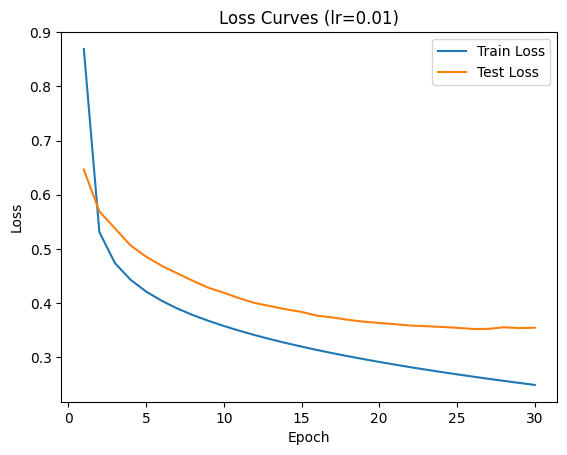

Sigmoid with Xavier initialization
Best accuracy = 76.66% at epoch 30



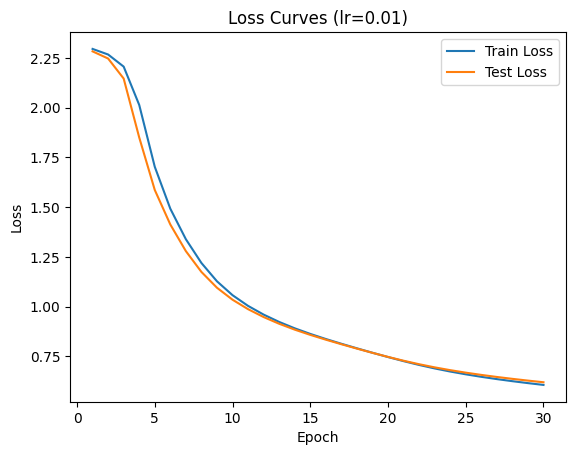

Tanh with Xavier initialization
Best accuracy = 87.07% at epoch 30



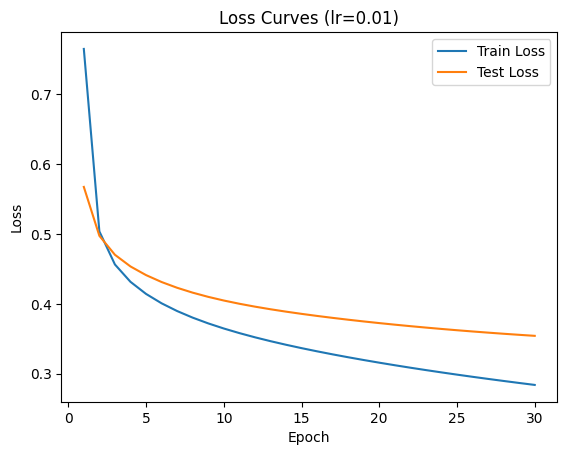

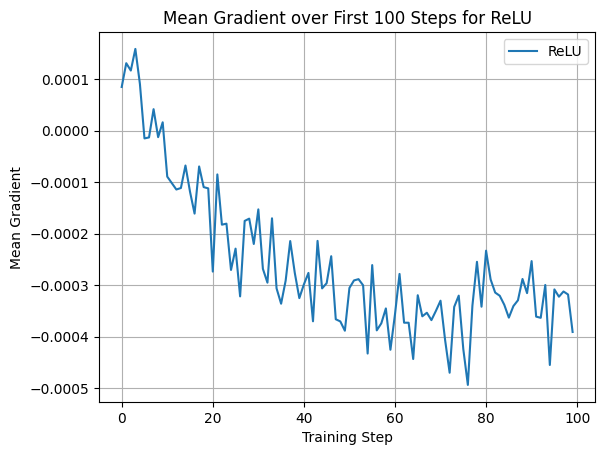

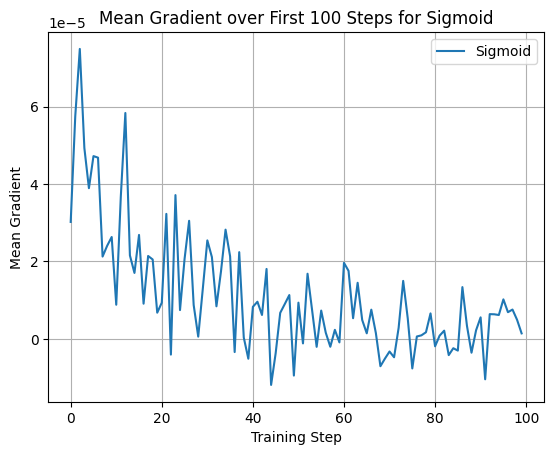

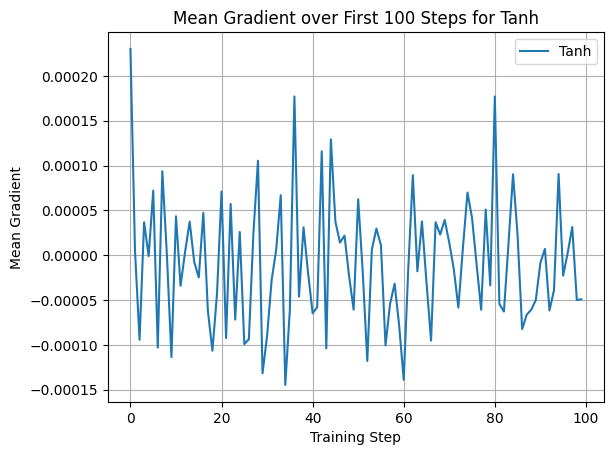

Final test accuracies with Xavier initialization:
ReLU: 87.40%
Sigmoid: 76.66%
Tanh: 87.07%


In [120]:
# Compare ReLU, Sigmoid and Tanh with Xavier initialization
lr = 0.01
epochs = 30
hidden_lay = [256, 512, 64]
criterion = nn.CrossEntropyLoss()

model_relu = FlexibleNetActivation(hidden_units=hidden_lay, activation_fn=nn.ReLU)
model_relu.apply(init_weights)
model_sigmoid = FlexibleNetActivation(hidden_units=hidden_lay, activation_fn=nn.Sigmoid)
model_sigmoid.apply(init_weights)
model_tanh = FlexibleNetActivation(hidden_units=hidden_lay, activation_fn=nn.Tanh)
model_tanh.apply(init_weights)

optimizer_relu = torch.optim.SGD(params=model_relu.parameters(), lr=lr)
optimizer_sigmoid = torch.optim.SGD(params=model_sigmoid.parameters(), lr=lr)
optimizer_tanh = torch.optim.SGD(params=model_tanh.parameters(), lr=lr)

relu_train_losses, relu_test_losses, relu_test_accs = [], [], []
sigmoid_train_losses, sigmoid_test_losses, sigmoid_test_accs = [], [], []
tanh_train_losses, tanh_test_losses, tanh_test_accs = [], [], []
gradients_relu, gradients_sigmoid, gradients_tanh = [], [], []

for epoch in range(1, epochs + 1):
    print(f"Epoch {epoch}/{epochs}")
    # ReLU
    train_loss, train_grads = train_with_loss_and_grads(train_dataloader, model_relu, loss_fn, optimizer_relu)
    acc, test_loss = test(test_dataloader, model_relu, loss_fn)

    relu_train_losses.append(train_loss)
    relu_test_losses.append(test_loss)
    relu_test_accs.append(acc)
    gradients_relu.append(train_grads)
    
    # Sigmoid
    train_loss, train_grads = train_with_loss_and_grads(train_dataloader, model_sigmoid, loss_fn, optimizer_sigmoid)
    acc, test_loss = test(test_dataloader, model_sigmoid, loss_fn)

    sigmoid_train_losses.append(train_loss)
    sigmoid_test_losses.append(test_loss)
    sigmoid_test_accs.append(acc)
    gradients_sigmoid.append(train_grads)
    
    # Tanh
    train_loss, train_grads = train_with_loss_and_grads(train_dataloader, model_tanh, loss_fn, optimizer_tanh)
    acc, test_loss = test(test_dataloader, model_tanh, loss_fn)

    tanh_train_losses.append(train_loss)
    tanh_test_losses.append(test_loss)
    tanh_test_accs.append(acc)
    gradients_tanh.append(train_grads)
    
# Plot results
print("ReLU with Xavier initialization")
plot_train_test_loss(relu_train_losses, relu_test_losses, relu_test_accs, lr)
print("Sigmoid with Xavier initialization")
plot_train_test_loss(sigmoid_train_losses, sigmoid_test_losses, sigmoid_test_accs, lr)
print("Tanh with Xavier initialization")
plot_train_test_loss(tanh_train_losses, tanh_test_losses, tanh_test_accs, lr)

# plot gradients
# --- Flatten per-epoch lists into one long list per activation ---
grads_relu_flat    = [g for epoch in gradients_relu    for g in epoch]
grads_sigmoid_flat = [g for epoch in gradients_sigmoid for g in epoch]
grads_tanh_flat    = [g for epoch in gradients_tanh    for g in epoch]

# --- Plot ---
# Plot ReLU gradients 
plt.figure()
plt.plot(grads_relu_flat, label='ReLU')
plt.xlabel('Training Step')
plt.ylabel('Mean Gradient')
plt.title('Mean Gradient for ReLU with Xavier')
plt.legend()
plt.grid(True)
plt.show()

# Plot Sigmoid gradients 
plt.figure()
plt.plot(grads_sigmoid_flat, label='Sigmoid')
plt.xlabel('Training Step')
plt.ylabel('Mean Gradient')
plt.title('Mean Gradient for Sigmoid with Xavier')
plt.legend()
plt.grid(True)
plt.show()

# Plot Tanh gradients 
plt.figure()
plt.plot(grads_tanh_flat, label='Tanh')
plt.xlabel('Training Step')
plt.ylabel('Mean Gradient')
plt.title('Mean Gradient for Tanh with Xavier')
plt.legend()
plt.grid(True)
plt.show()

# Final results
print("Final test accuracies with Xavier initialization:")
print(f"ReLU: {relu_test_accs[-1]*100:.2f}%")
print(f"Sigmoid: {sigmoid_test_accs[-1]*100:.2f}%")
print(f"Tanh: {tanh_test_accs[-1]*100:.2f}%")